<a href="https://colab.research.google.com/github/kKawsarAlam/Regression-Analysis/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**  

Linear regression is a foundational supervised machine learning algorithm that models the linear relationship between a dependent variable (target) and one or more independent variables (features). It predicts continuous numerical outcomes by fitting a straight line (regression line) that minimizes the distance between predicted and actual data points, commonly using the least squares method.   

Formula:  
For simple linear regression: (y = mx+c),   
where, y is the predicted value, x is the input feature, m is the slope (weight), and c is the y-intercept.  

For multiple linear regression: (y = w1 * x1 + w2 * x2 + b),

Common Use Cases:  
Sales Forecasting: Predicting future revenue based on historical data.  
Risk Assessment: Evaluating potential dangers for companies.  
Price Estimation: Forecasting house prices based on size, location, and other factors.  
Trend Analysis: Evaluating patterns in data over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Create a custom dictionary with sample data 'area' and 'price'
data = {
    'area': [2600, 2700, 3000, 3200, 3600, 4000, 4200],
    'price': [550000, 555000, 565000, 610000, 680000, 725000, 750000]
}

In [3]:
# Convert the dictonary into DataFrame
df = pd.DataFrame(data)
display(df.head())

,area,price
0,2600,550000
1,2700,555000
2,3000,565000
3,3200,610000
4,3600,680000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

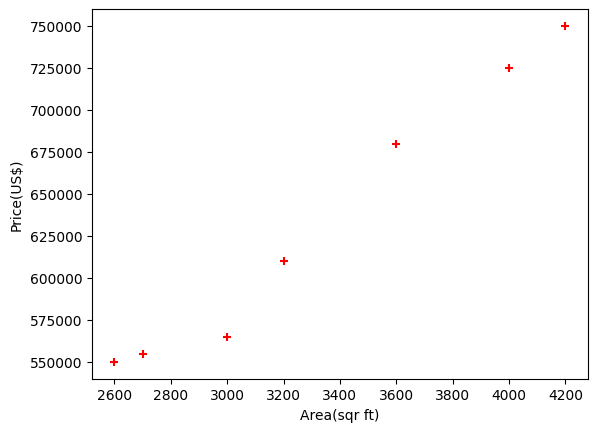

In [4]:
# Scatter plot the data
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel('Area(sqr ft)')
plt.ylabel('Price(US$)')
plt

In [5]:
li_reg = linear_model.LinearRegression()
li_reg.fit(df[['area']], df.price)

LinearRegression()

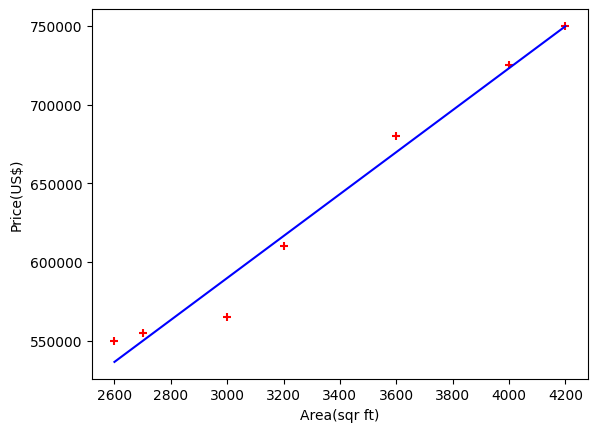

In [6]:
# Best Regression line
plt.xlabel('Area(sqr ft)')
plt.ylabel('Price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, li_reg.predict(df[['area']]), color='blue')

In [7]:
# Calculated coefficient
m = li_reg.coef_
m

array([133.35373317])

In [8]:
# Calculated intercept
b = li_reg.intercept_
b

np.float64(189694.00244798034)

In [9]:
# Another custom area dataset to prediction the price
data = {
    'area': [ 1000, 1500, 2300, 3540, 4120, 4560, 5490,3460, 4750, 2300, 9000, 8600, 7100]
}

In [10]:
d = pd.DataFrame(data)
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [11]:
p = li_reg.predict(d)

In [12]:
d['price'] = p
d

,area,price
0,1000,3.230477e+05
1,1500,3.897246e+05
2,2300,4.964076e+05
3,3540,6.617662e+05
4,4120,7.391114e+05
5,4560,7.977870e+05
6,5490,9.218060e+05
7,3460,6.510979e+05
8,4750,8.231242e+05
9,2300,4.964076e+05


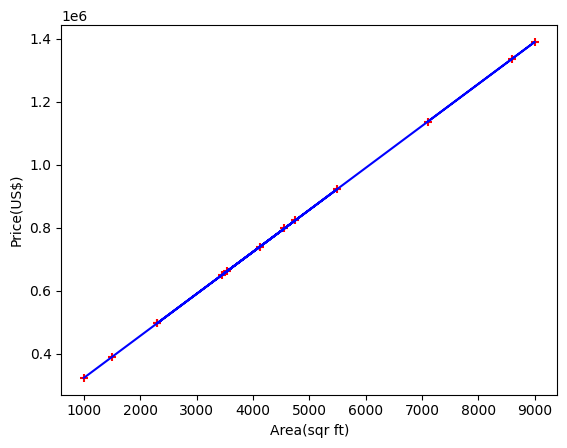

In [13]:
plt.xlabel('Area(sqr ft)')
plt.ylabel('Price(US$)')
plt.scatter(d.area, d.price, color='red', marker='+')
plt.plot(d.area, li_reg.predict(d[['area']]), color='blue')

**For multiple variable (feature -> area, bedroom, age)**

In [14]:
# Create a dictionary with sample data for 'area' and 'price'
data_2 = {
    'area': [1200, 1600, 2000, 2600, 3000, 3200, 3600, 4000],
    'bedroom': [2, 2, 3, 3, 4, np.nan, 3, 5],
    'age': [10, 12, 15, 20, 15, 18, 30, 8],
    'price': [450000, 500000, 525000, 550000, 565000, 610000, 595000, 760000]
}

In [16]:
df = pd.DataFrame(data_2)
df.head(8)

,area,bedroom,age,price
0,1200,2.0,10,450000
1,1600,2.0,12,500000
2,2000,3.0,15,525000
3,2600,3.0,20,550000
4,3000,4.0,15,565000
5,3200,NaN,18,610000
6,3600,3.0,30,595000
7,4000,5.0,8,760000


In [17]:
# handiling missing value of bedroom
import math
median_bedroom = math.floor(df.bedroom.median()) # for integer median vlaue
median_bedroom

3

In [18]:
# Fill up the null value of bedroom using median
df.bedroom = df.bedroom.fillna(median_bedroom)
df

,area,bedroom,age,price
0,1200,2.0,10,450000
1,1600,2.0,12,500000
2,2000,3.0,15,525000
3,2600,3.0,20,550000
4,3000,4.0,15,565000
5,3200,3.0,18,610000
6,3600,3.0,30,595000
7,4000,5.0,8,760000


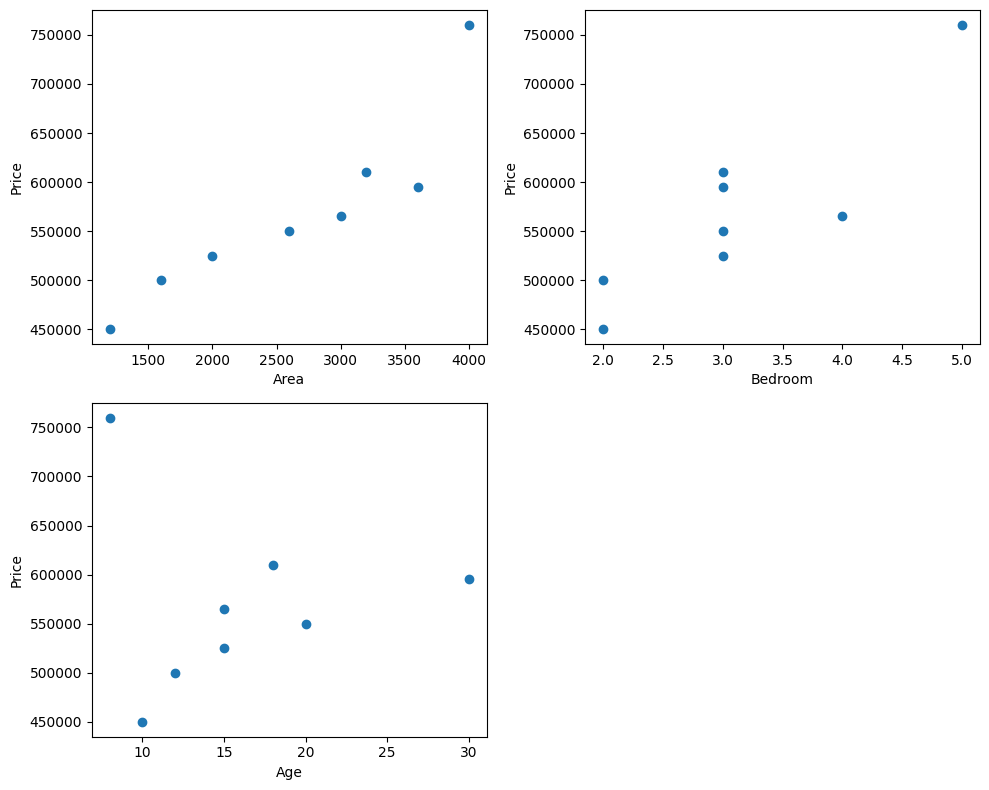

In [19]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(df["area"], df["price"])
plt.xlabel("Area")
plt.ylabel("Price")

plt.subplot(2, 2, 2)
plt.scatter(df["bedroom"], df["price"])
plt.xlabel("Bedroom")
plt.ylabel("Price")

plt.subplot(2, 2, 3)
plt.scatter(df["age"], df["price"])
plt.xlabel("Age")
plt.ylabel("Price")

plt.tight_layout()
plt.show()


In [20]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedroom', 'age']], df.price)

LinearRegression()

In [21]:
# calculate coefficient (m)
reg.coef_

array([   115.42048724, -17482.73125381,  -6462.15331415])

In [22]:
# calculate intercept (b)
reg.intercept_

np.float64(421538.6970139339)

In [24]:
# Test value and predict
prediction = reg.predict([[3000, 3, 30]])
print(f"predicted price : {prediction[0]:.4f}")

predicted price : 521487.3655


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# how to calculate the price in LinearRegression
# y = m1 * area + m2 * bedroom * m3 * age + b

115.42048724 * 3000 + -17482.73125381 * 3 + -6462.15331415 * 30 + 421538.6970139339

521487.36554800393

In [27]:
# With Test value and predict the price
prediction = reg.predict([[3500, 3, 10]])
print(f"predicted price : {prediction[0]:.4f}")

predicted price : 708440.6754


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
